# Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is used to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files (raw data) using the following url and stored in CSV file -

csv download link:
https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view

<img src="zomato_logo.jpg">

## Observing the csv file we see that the dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Objective 1

### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India

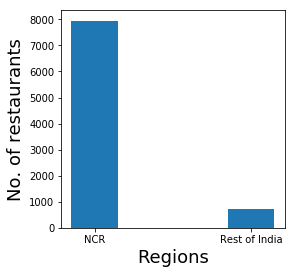

Restaurants present in NCR region = 7947
Restaurants present in Rest of India = 705


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# selecting restaurants  which are in india
a=a[a["Country Code"]==1]

a["City"].replace("New Delhi","Delhi-NCR",inplace=True)
a["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
a["City"].replace("Noida","Delhi-NCR",inplace=True)
a["City"].replace("Gurgaon","Delhi-NCR",inplace=True)
a["City"].replace("Faridabad","Delhi-NCR",inplace=True)

# NCR is the count of restaurants in NCR region
NCR=a["City"].value_counts()[0]


# total is the count of all the restaurants in India
total=len(a)

# count of restuarantsout of NCR region
Non_NCR=total-NCR


#ploting the graph
plt.figure(figsize=(4, 4)) #defines the size of graph figure

plt.bar(["NCR","Rest of India"],[NCR,Non_NCR],width=0.3,align="center")
plt.ylabel("No. of restaurants", fontsize=18)
plt.xlabel("Regions",fontsize=18)
plt.show()

# Printing Conclusion
print("Restaurants present in NCR region =",NCR)
print("Restaurants present in Rest of India =",Non_NCR)


### Objective 2

### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India

In [82]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# selecting restaurants  which are in india
a=a[a["Country Code"]==1]


# Changing all city names which lie in NCR region to Delhi-NCR
a["City"].replace("New Delhi","Delhi-NCR",inplace=True)
a["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
a["City"].replace("Noida","Delhi-NCR",inplace=True)
a["City"].replace("Gurgaon","Delhi-NCR",inplace=True)
a["City"].replace("Faridabad","Delhi-NCR",inplace=True)

# changing rest city names to "Rest of India"
a["City"][a["City"]!="Delhi-NCR"]="Rest of India"


# finding cuisines served in NCR restaurants
NCR=a[a["City"]=="Delhi-NCR"]
NCR_cuisine=NCR["Cuisines"]

# finding cuisines in rest of india
rest=a[a["City"]=="Rest of India"]
rest_cuisine=rest["Cuisines"]


def create_list(data,empty=set()):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.add(e)
    return empty

# creating a list of all cuisines in NCR
t=NCR_cuisine.apply(create_list)
list_NCR=list(t.iloc[0])

# creating a list of all cuisines in rest of india
s=rest_cuisine.apply(create_list)
list_rest=list(s.iloc[0])


#p contains cuisines served in rest of india but not in NCR (Acoording To CSV file)
p=set(list_rest) - set(list_NCR)
print("Cuisines Different in both regions according to Dataset in CSV format - ",list(p))



#VERIFYING if these cuisines are really not served in NCR or its due to limited dataset 


head={"Accept": "application/json","user-key": "cb6a83f3c16be0b3a87f8e11503122b7"}

data=requests.get("https://developers.zomato.com/api/v2.1/cuisines?city_id=1", headers=head)
d=data.json()
f=d["cuisines"]

for e in f:
    a=e["cuisine"]["cuisine_name"]
    if a in p:
        print("The anomaly is due to Incomplete Dataset")
        print("API search shows that these cuisines are served in NCR region as well")
        break
else:
    print("Cuisines not served in NCR region")

C:\Users\Sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Cuisines Different in both regions according to Dataset in CSV format -  ['Cajun', 'German', 'BBQ', 'Malwani']
The anomaly is due to Incomplete Dataset
API search shows that these cuisines are served in NCR region as well


### Objective 3

### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

C:\Users\Sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TOP 10 cuisines served maximum no. of restuarants in Delhi-NCR -
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
dtype: int64

TOP 10 cuisines served maximum no. of restuarants in Rest of India -
North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
dtype: int64



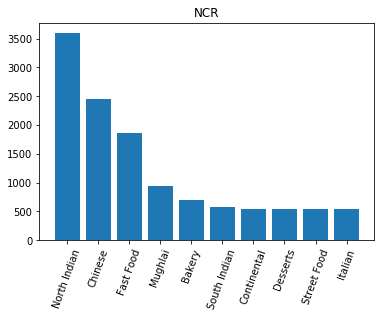

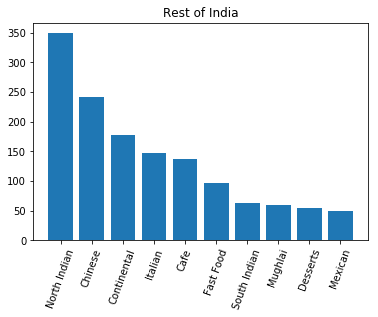

In [76]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# selecting restaurants  which are in india
a=a[a["Country Code"]==1]


# Changing all city names which lie in NCR region to Delhi-NCR
a["City"].replace("New Delhi","Delhi-NCR",inplace=True)
a["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
a["City"].replace("Noida","Delhi-NCR",inplace=True)
a["City"].replace("Gurgaon","Delhi-NCR",inplace=True)
a["City"].replace("Faridabad","Delhi-NCR",inplace=True)

# changing rest city names to "Rest of India"
a["City"][a["City"]!="Delhi-NCR"]="Rest of India"


# finding cuisines served in NCR restaurants
NCR=a[a["City"]=="Delhi-NCR"]
NCR_cuisine=NCR["Cuisines"]

# finding cuisines in rest of india
rest=a[a["City"]=="Rest of India"]
rest_cuisine=rest["Cuisines"]


def create_list(data,empty=[]):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.append(e)
    return empty

# creating a list of all cuisines in NCR
t=NCR_cuisine.apply(create_list)
list_NCR=list(t.iloc[0])

def create_new(data,empty=[]):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.append(e)
    return empty

# creating a list of all cuisines in rest of india
s=rest_cuisine.apply(create_new)
list_rest=list(s.iloc[0])

#ploting for Delhi NCR
print("TOP 10 cuisines served maximum no. of restuarants in Delhi-NCR -")
tempseries=pd.Series(list_NCR)
temp=tempseries.value_counts()
print(temp[0:10])
print()

#ploting for Rest of India
print("TOP 10 cuisines served maximum no. of restuarants in Rest of India -")
tseries=pd.Series(list_rest)
t=tseries.value_counts()
print(t[0:10])
print()

#converting to a series as to perform panda functions
tNCR=pd.Series(list_NCR)
a=tNCR.value_counts()
x1=a[0:10]

trest=pd.Series(list_rest)
b=trest.value_counts()
x2=b[0:10]

plt.title("NCR")
plt.bar(x1.index,x1.values)
plt.xticks(rotation=70)
plt.show()


plt.title("Rest of India")
plt.bar(x2.index,x2.values)
plt.xticks(rotation=70)
plt.show()


### Objective 4

### How the cuisines served in NCR region is different from thoseserved in the rest of India

C:\Users\Sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


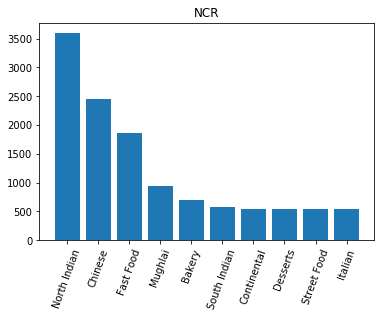

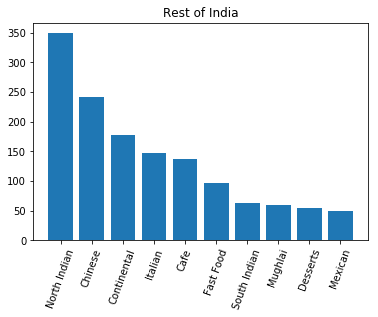

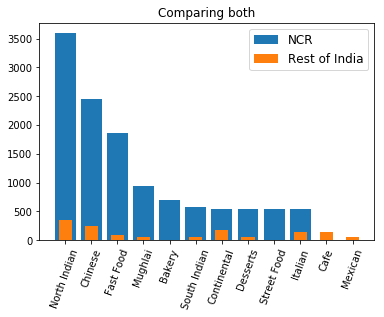

In [74]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# selecting restaurants  which are in india
a=a[a["Country Code"]==1]


# Changing all city names which lie in NCR region to Delhi-NCR
a["City"].replace("New Delhi","Delhi-NCR",inplace=True)
a["City"].replace("Ghaziabad","Delhi-NCR",inplace=True)
a["City"].replace("Noida","Delhi-NCR",inplace=True)
a["City"].replace("Gurgaon","Delhi-NCR",inplace=True)
a["City"].replace("Faridabad","Delhi-NCR",inplace=True)

# changing rest city names to "Rest of India"
a["City"][a["City"]!="Delhi-NCR"]="Rest of India"


# finding cuisines served in NCR restaurants
NCR=a[a["City"]=="Delhi-NCR"]
NCR_cuisine=NCR["Cuisines"]

# finding cuisines in rest of india
rest=a[a["City"]=="Rest of India"]
rest_cuisine=rest["Cuisines"]


def create_list(data,empty=[]):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.append(e)
    return empty

# creating a list of all cuisines in NCR
t=NCR_cuisine.apply(create_list)
list_NCR=list(t.iloc[0])

def create_new(data,empty=[]):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.append(e)
    return empty

# creating a list of all cuisines in rest of india
s=rest_cuisine.apply(create_new)
list_rest=list(s.iloc[0])

# combining the lists from both region
total_list=list_NCR +list_rest

#converting to a series as to perform panda functions
tNCR=pd.Series(list_NCR)
a=tNCR.value_counts()
x1=a[0:10]

trest=pd.Series(list_rest)
b=trest.value_counts()
x2=b[0:10]

plt.title("NCR")
plt.bar(x1.index,x1.values)
plt.xticks(rotation=70)
plt.show()


plt.title("Rest of India")
plt.bar(x2.index,x2.values)
plt.xticks(rotation=70)
plt.show()

l=["NCR","Rest of India"]
plt.title("Comparing both")
plt.bar(x1.index,x1.values)
plt.bar(x2.index,x2.values,0.5)
plt.xticks(rotation=70)
plt.legend(l,loc=1,fontsize=12)
plt.show()

## CONCLUSION:


1.We can conclude that no.of restaurants listed in Rest of India is far less as compared to Delhi-NCR.

      Restauants in Delhi-NCR=7947
      Restaurants present in Rest of India = 705

2.Restaurants in NCR region serve Bakery items and Street food more often than the restaurants in rest of India.

3.Restaurants located out of NCR region serve Cafe and Italian food more often than the restaurants in Delhi-NCR.

# User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant. Thus its crucial to know as to what factors affect the rating of the reataurants. This knowledge will enable the restaurants to take effective steps to improve their ratings. 
<img src="star.png">

### Objective 1

### To study how ratings of the restaurants are affected by the number of votes received by it

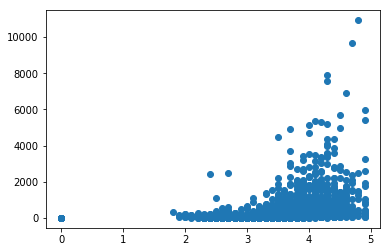

In [66]:

import pandas as pd
import matplotlib.pyplot as plt



a=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting restaurants from india only
a=a[a["Country Code"]==1]


rating=a["Aggregate rating"]
votes=a["Votes"]

# plotting a bubble graph
plt.scatter(rating,votes)
plt.show()

## Conclusion

The ratings of the restaurant are directly proportional to the number of votes.

We can interpret it as follows -
    
    ->  The rating is high so more people start visiting the restaurant
        and they also rate them high which inturn attracts more people to visit the restaurant.
    ->  One important point to note is that As the no. of votes are more than 5000 then the restaurant
        always has a rating of 4.0+.

### Objective 2

### To study how the number of cuisines served in the restaurants affects the restaurants aggregate rating.

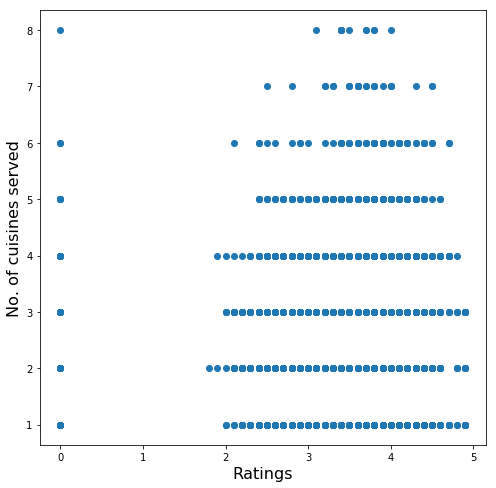

In [65]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting restaurants from india only
a=a[a["Country Code"]==1]

cuisine=a["Cuisines"]
rating=a["Aggregate rating"]

cuisine.dropna(inplace=True)

rating=rating[cuisine.index]
def count1(data):
    l=data.split(",")
    return len(l)
    
cuisine=cuisine.apply(count1)

plt.figure(figsize=(8,8))
plt.scatter(rating,cuisine,)
plt.xlabel("Ratings",fontsize=16)
plt.ylabel("No. of cuisines served",fontsize=16)
plt.show()

## Conclusion:
The graph show that there is no such strong relationship between No. of cuisines served and rating.
But Its evident from the graph that for restaurants serving  more than 5 cuisines
its not very likely that they have rating greater than 4.

### Objective 3

### To study the effect of the average cost for two has of the rating of the restaurants.

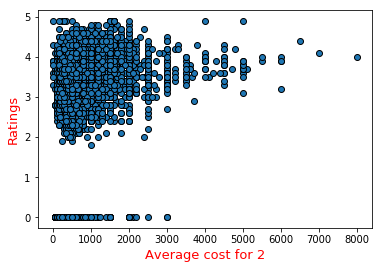

To get most prefered average cost for 2


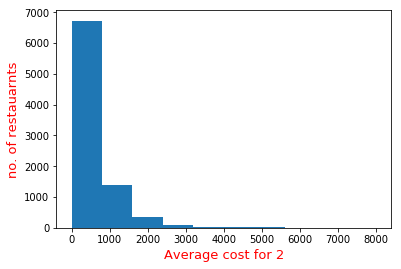

In [64]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting restaurants from india only
a=a[a["Country Code"]==1]

cost=a["Average Cost for two"]
rating=a["Aggregate rating"]


plt.scatter(cost,rating,edgecolor="black")
plt.xlabel("Average cost for 2",fontsize=13,color="r")
plt.ylabel("Ratings",fontsize=13,color="r")
plt.show()

print("To get most prefered average cost for 2")
plt.hist(cost)
plt.ylabel("no. of restauarnts",fontsize=13,color="r")
plt.xlabel("Average cost for 2",fontsize=13,color="r")
plt.show()

# Conclusion:
Most for the restaurant prefer to keep the average cost for two between 0-900.

We can observe from the plot that for restaurants whose average cost is above 400 the rating is always higher than 3.0.

### Objective 4

### To study how the ratings of the restaurant are affected by particular cuisines they are serving. 

Please double click on the graph to zoom in


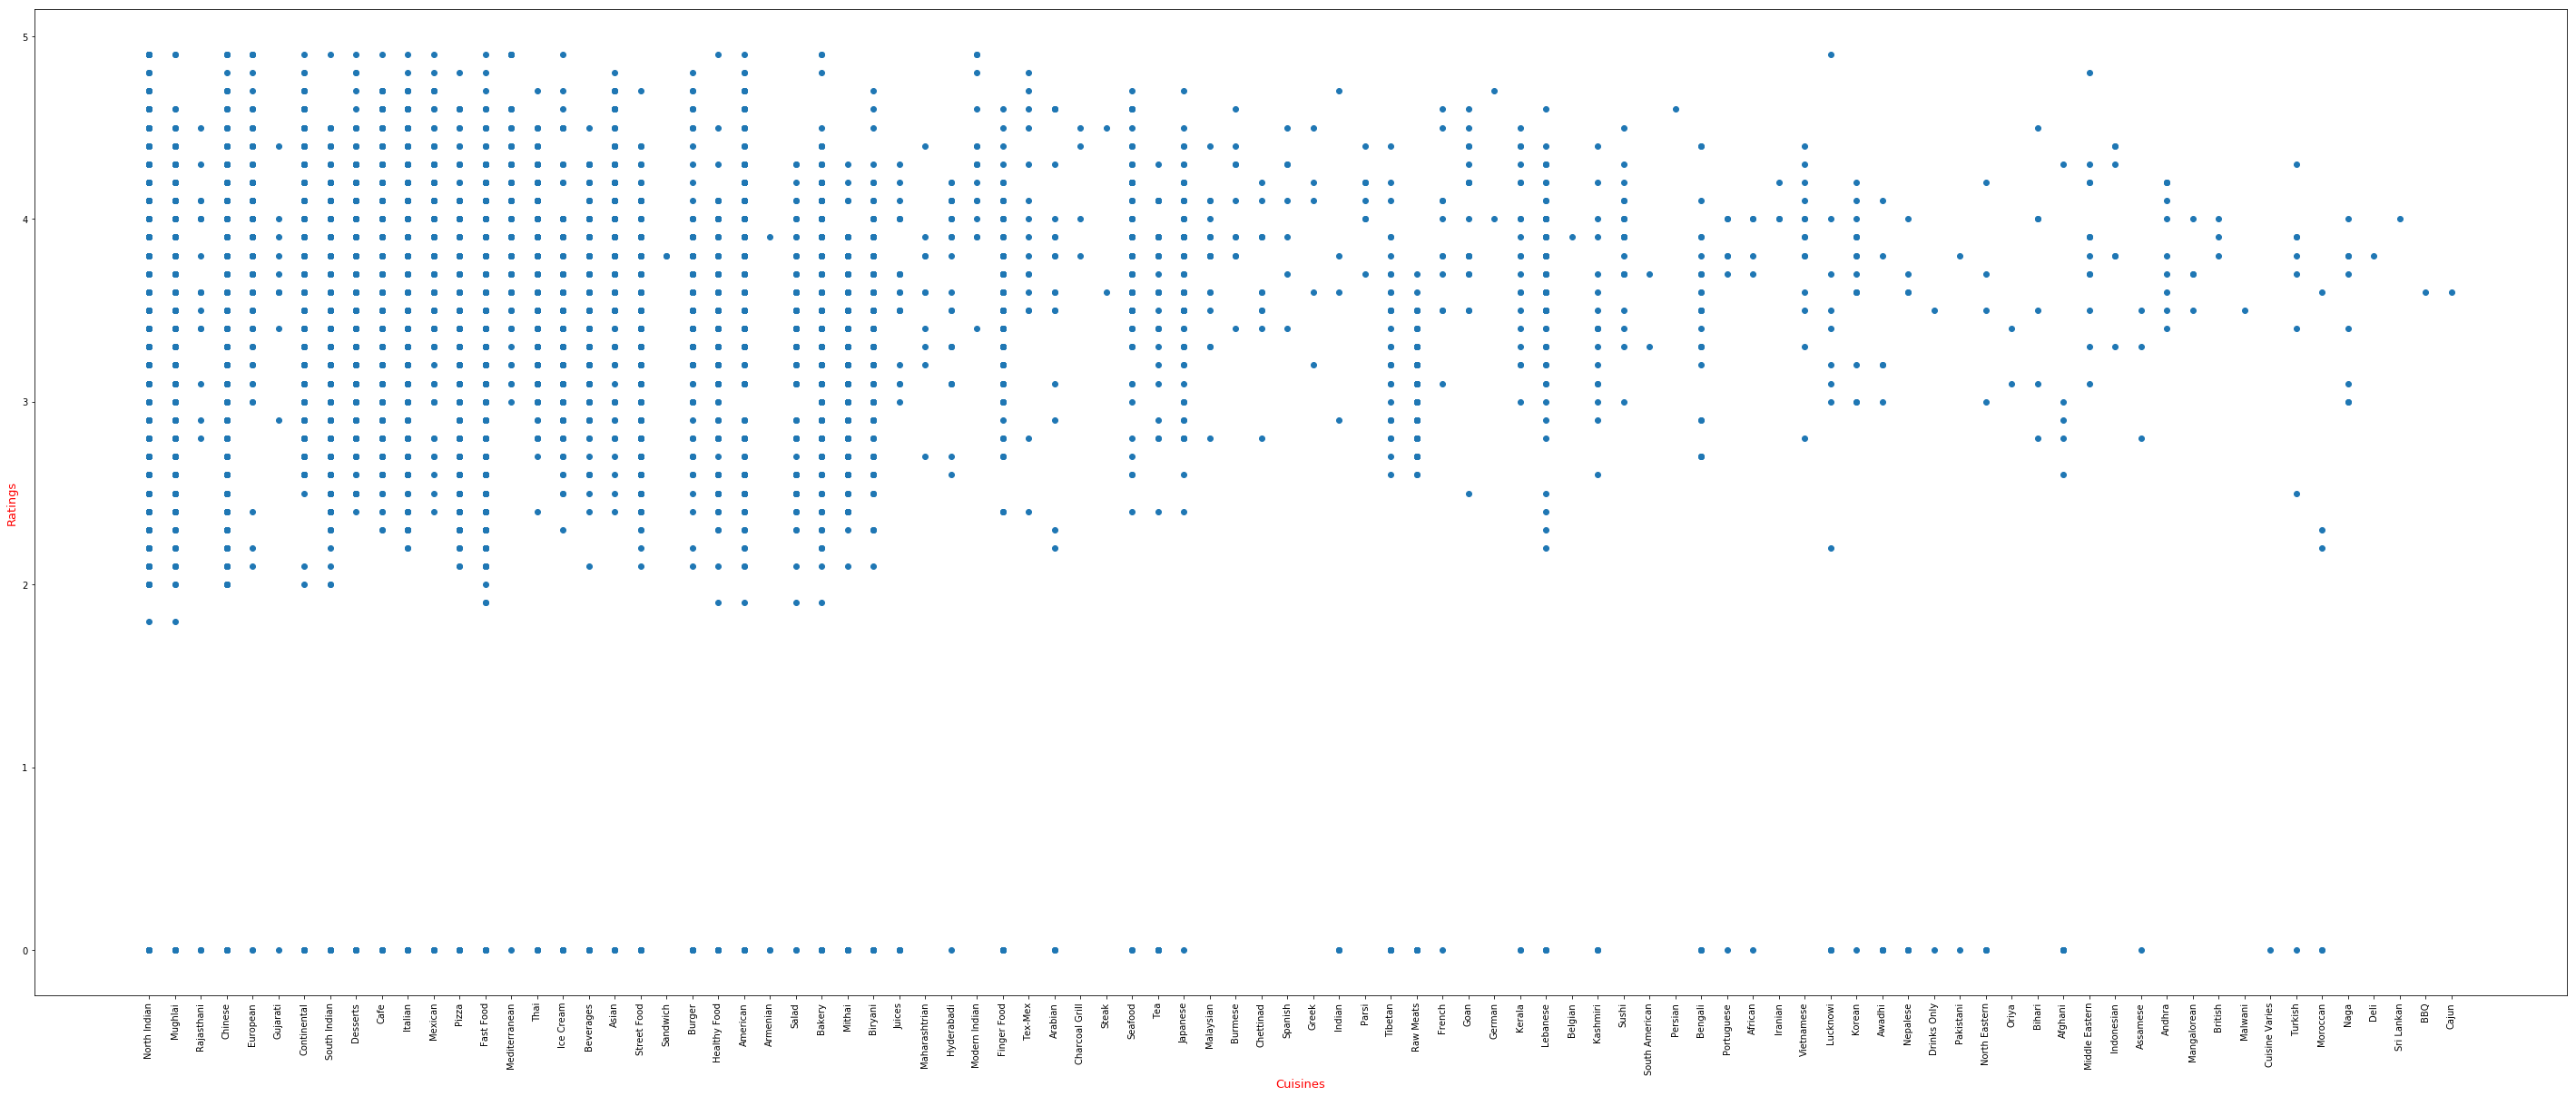

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting restaurants from india only
a=df[df["Country Code"]==1]

# selecting useful columns
a=pd.DataFrame(a,columns=["Cuisines","Aggregate rating"])

# Droping Na values
a.dropna(inplace=True)

# Making seperate series 
cuisine=a["Cuisines"]
rating=a["Aggregate rating"]

# empty list
list_cui=[]
list_rat=[]
for i in range(len(cuisine)):
    string=cuisine.iloc[i]
    rat=rating.iloc[i]
    l=string.split(",")
    for q in l:
        q=q.strip()
        list_cui.append(q)
        list_rat.append(rat)
print("Please double click on the graph to zoom in")
plt.figure(figsize=(50,20))
plt.scatter(list_cui,list_rat)
plt.xlabel("Cuisines",fontsize=13,color="r")
plt.ylabel("Ratings",fontsize=13,color="r")
plt.xticks(rotation=90)
plt.show()

## Conclusion

In [ ]:
Restaurants serving state specific foods (regional) or foods from neighbour countries such
as Sri Lanka,,Tibet, Nepal are less likely to be rated 5 stars. Cuisines native to famous and 
popular food destinations such as America, France, Italy, and other European countries are loved
by people and restaurants serving these dishes are generally rated higher than their counterparts.

## Digging deep

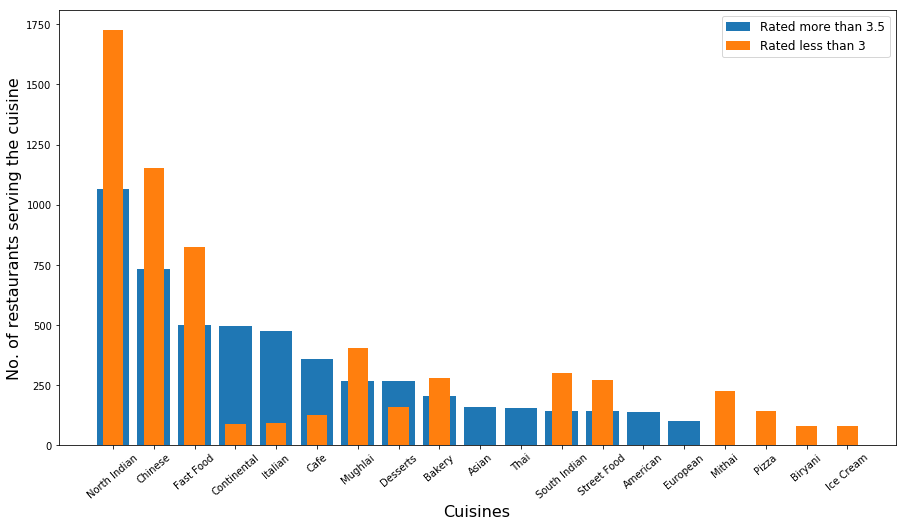

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting restaurants from india only
a=df[df["Country Code"]==1]

# selecting useful columns
a=pd.DataFrame(a,columns=["Cuisines","Aggregate rating"])

# Droping Na values
a.dropna(inplace=True)

# Making seperate series 
cuisine=a["Cuisines"]
rating=a["Aggregate rating"]

# empty lists to create two categories based on aggregate rating
list_cui_above=[]
list_cui_below=[]

# Segregating cuisines and restaurants onthe basis of rating 
for i in range(len(cuisine)):
    string=cuisine.iloc[i]
    rat=rating.iloc[i]
    l=string.split(",")
    for q in l:
        q=q.strip()
        if rat>=3.5:
            list_cui_above.append(q)
    
        elif rat<3:
            list_cui_below.append(q)

        else:
            None
            
r=pd.Series(list_cui_above)
above=r.value_counts()[0:15]

s=pd.Series(list_cui_below)
below=s.value_counts()[0:15]


Rating=["Rated more than 3.5","Rated less than 3"]
plt.figure(figsize=(15,8))
plt.bar(above.index,above.values,alpha=1)
plt.xticks(rotation=40)
plt.ylabel("No. of restaurants serving the cuisine", fontsize=16)
plt.xlabel("Cuisines", fontsize=16)
plt.bar(below.index,below.values,0.5,alpha=1)
plt.legend(Rating,loc=1,fontsize=12)
plt.xticks(rotation=40)
plt.show()

## Conclusion:

### I have compiled most served dishes and categorised them into 2 categories-
1. best rated restaurants (having Aggregate rating >= 3.5)
2. worst rated restaurants (having Aggregate rating <3 )

After plotting this data on bar graph we can infer the following:

Restaurants serving Italian, Continental, Cafe, Asian, Thai, European and American cuisines are better chances
of getting rated above average , i.e above 3.5. 

Analysis also show that restaurants serving South indian, Street food, Mithai etc. have greater chances of getting lower ratings i.e less than 3 .

### We now aim to find the top ten Localities rated higher or lower on the basis of the weighted aggregate ratings of the restaurants in the rating.

Weighted average rating is given by:
>Weighted Restaurant Rating :       Σ (number of votes * rating) / Σ (number of votes) .

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=pd.read_csv("zomato.csv", encoding="latin-1")

a=a[a["Country Code"]==1]


df=pd.DataFrame(a,columns=["Locality","Aggregate rating","Votes"])
df["Total rating product"]=df["Votes"]*df["Aggregate rating"]


# Grouping restaurants in same locality together and calculating their weighted rating
g_sum=df.groupby(df["Locality"]).sum()
g_sum["weighted"]=g_sum["Total rating product"]/g_sum["Votes"]
weighted=g_sum["weighted"]

# sorting the localities with highest weighted ratings
i=np.argsort(-weighted.values)
w=weighted[i]

# selecting top10 localities
w=w[0:10]

print("The top 10 localities with highest weghted ratings are as follows:")
print(w)

The top 10 localities withhighest weghted ratings are as follows:
Locality
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000
Name: weighted, dtype: float64


# Output
The top 10 localities withhighest weghted ratings are as follows:
Locality
Hotel Clarks Amer, Malviya Nagar    4.900000
Aminabad                            4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Deccan Gymkhana                     4.800000
Express Avenue Mall,  Royapettah    4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000

## Objective :

### Plot the bar graph top 15 restaurants have a maximum number of outlets

Top 15 Restaurants having maximumno. of outlets
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
Giani's             51
McDonald's          48
Keventers           34
Pizza Hut           30
Baskin Robbins      28
Barbeque Nation     26
Dunkin' Donuts      22
Barista             22
Costa Coffee        20
Pind Balluchi       20
Wah Ji Wah          19
Name: Restaurant Name, dtype: int64


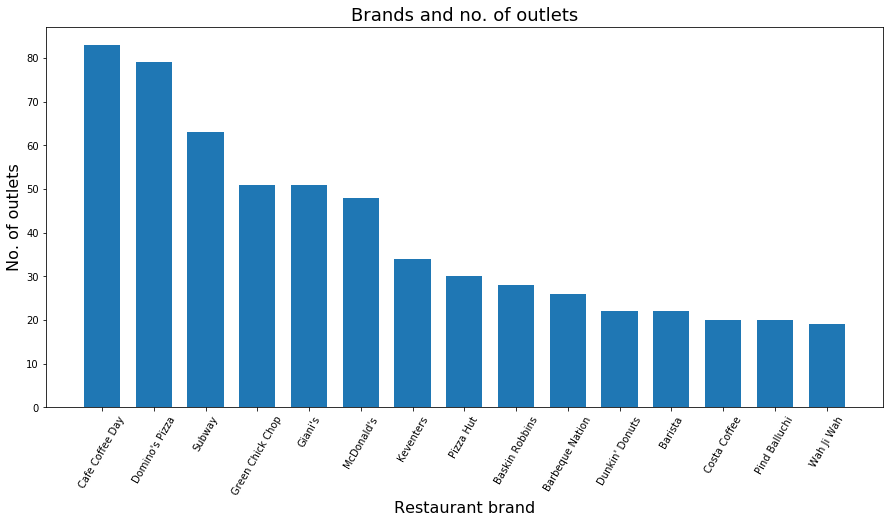

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=pd.read_csv("zomato.csv", encoding="latin-1")
rest=a["Restaurant Name"]
rest.replace("Giani","Giani's",inplace=True)


#counting no. of outlets of restaurants
outlets=rest.value_counts()
print("Top 15 Restaurants having maximumno. of outlets")
print(outlets[0:15])

# ploting bar graph

plt.figure(figsize=(15,7))
plt.bar(outlets.index[0:15],outlets.values[0:15],0.7)
plt.xlabel("Restaurant brand",fontsize=16)
plt.ylabel("No. of outlets",fontsize=16)
plt.title("Brands and no. of outlets",fontsize=18)

plt.xticks(rotation=60)
plt.show()

## Objective:

### Plot the histogram of aggregate rating of restaurant

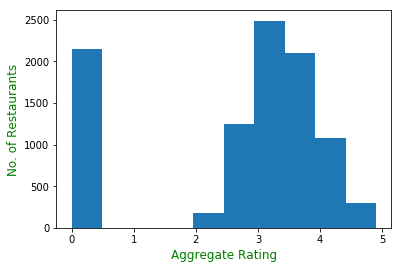


dropping the restaurants rated 0.0


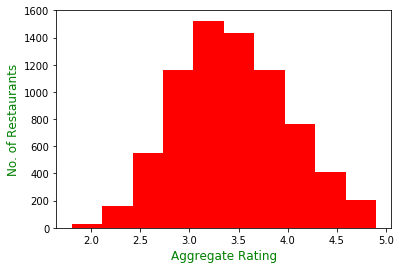

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=pd.read_csv("zomato.csv", encoding="latin-1")
anew=a["Restaurant Name"]
a2=a["Aggregate rating"]


# creating a new dataframe with only 2 columns (names ans rating)
f=pd.DataFrame(anew)
f["rating"]=a2

plt.hist(a2)
plt.xlabel("Aggregate Rating",fontsize=12,color="g")
plt.ylabel("No. of Restaurants",fontsize=12,color="g")
plt.show()


print("\ndropping the restaurants rated 0.0")
ind=f["rating"]!=0
d=f[ind]

plt.hist(d["rating"],color="r")
plt.xlabel("Aggregate Rating",fontsize=12,color="g")
plt.ylabel("No. of Restaurants",fontsize=12,color="g")
plt.show()

# Conclusion:
The Histogram above shows the frequency distribution of the ratings. the Y-axis (or the height) shows
the frequency and the X-axis shows the rating.

## Objective:

### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

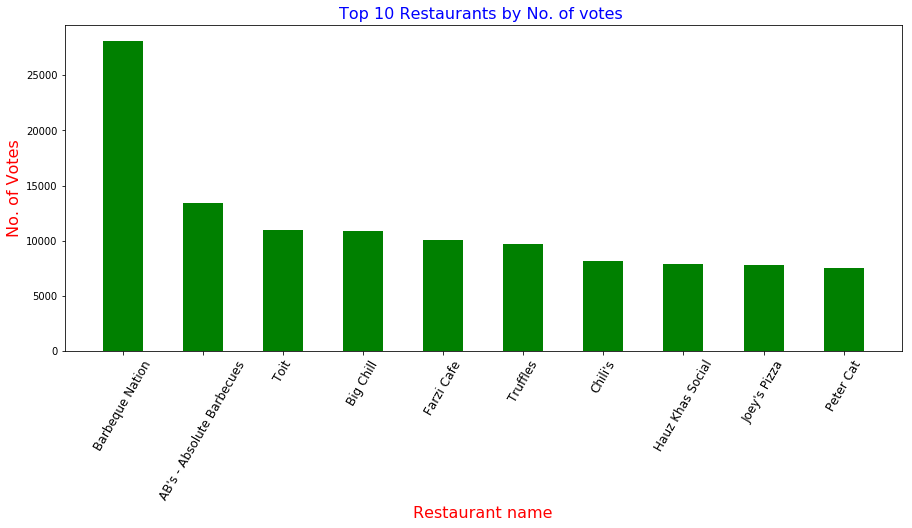

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=pd.read_csv("zomato.csv", encoding="latin-1")

# Segregating useful data (restaurant name and no. of votes received by them)
a1=a["Votes"]
a2=a["Restaurant Name"]
df=pd.DataFrame(a2)
df["votes"]=a1

# Grouping by same restaurant name and summing their votes
g=df.groupby(df["Restaurant Name"]).sum()

# Sorting restaurants by no. of votes
ans=g.sort_values(by="votes",ascending=False)

# data required for ploting graph
votesdata=ans["votes"]
names=ans.index

# # Ploting bar graph
plt.figure(figsize=(15,6))
plt.title("Top 10 Restaurants by No. of votes ",fontsize=16,color="b")
plt.bar(names[0:10],votesdata[0:10],color="g",width=0.5)
plt.ylabel("No. of Votes",fontsize=16,color="r")
plt.xlabel("Restaurant name",fontsize=16,color="r")
plt.xticks(rotation=60,fontsize=12)
plt.show()





## Objective

## Plot the graph of top 10 cuisines in USA

Top 10 cuisines in USA are shown by the pie chart :
American     112
Seafood       59
Sandwich      49
Burger        49
Pizza         49
Steak         42
Italian       38
Breakfast     37
Mexican       36
Sushi         34
dtype: int64


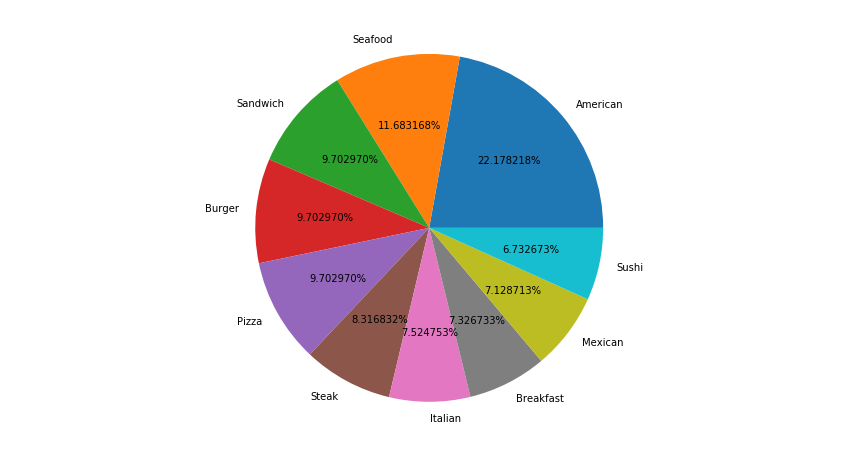

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=pd.read_csv("zomato.csv", encoding="latin-1")

# Selecting only cuisines from USA(country code of USA is 216)
a=a[a["Country Code"]==216]
cui=a["Cuisines"]

# Dropping na values if any
cui.dropna(inplace=True)


# This pandas series contain multiple cuisine in single row so it cannot be futher processed
# So we need to process this data to create a series which have only one cuisine in 1 row

def create_list(data,empty=[]):
    l=data.split(",")
    for e in l:
        e=e.strip()
        empty.append(e)
    return empty

# creating a list of all cuisines in USA
t=cui.apply(create_list)
list_cui=list(t.iloc[0])

# creating panda series outof this list
f=pd.Series(list_cui)
final=f.value_counts()

# selecting top 10
frequency=final.values[0:10]
cuisines=final.index[0:10]

# Plotting Pie chart
print("Top 10 cuisines in USA are shown by the pie chart :")
print(final[:10])

plt.figure(figsize=(15,8))
plt.axis("equal")
plt.pie(frequency,labels=cuisines,autopct="%2f%%")
plt.show()

# Conclusion:

The pie chart above shows the top 10 cuisines served in the USA along with their market share (among top 10 only).

## Objective:

### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

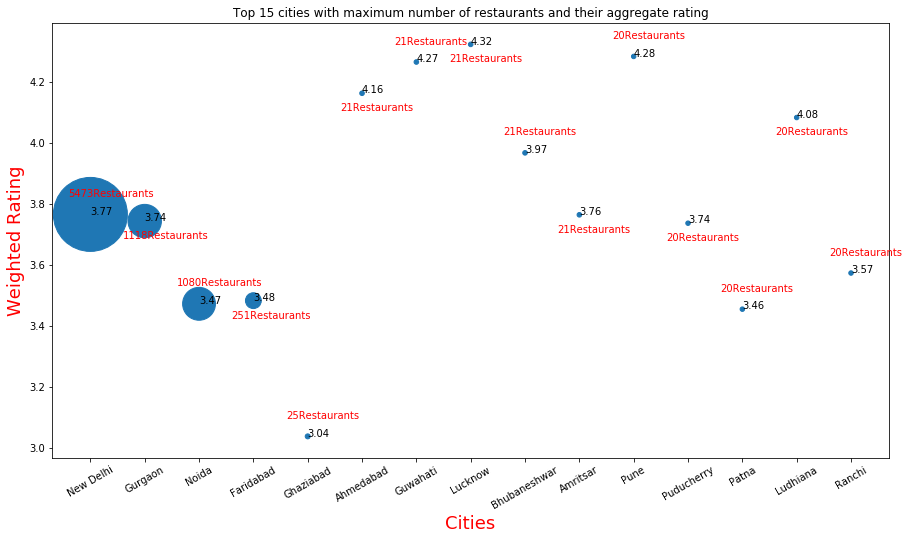

In [52]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR

a=pd.read_csv("zomato.csv", encoding="latin-1")

# selecting restaurants  which are in india
a=a[a["Country Code"]==1]

df=pd.DataFrame(a,columns=["City","Aggregate rating","Votes"])


# seperating cities and counting no. of restaurants respectively
name_city=df["City"]
l=name_city.value_counts()

# Calculating the Weighted Restaurant Rating 
df["Multiplied rating"]=df["Aggregate rating"]*df["Votes"]
g_sum=df.groupby("City").sum()
del g_sum["Aggregate rating"]
g_sum["Weighted Rating"]=g_sum["Multiplied rating"]/g_sum["Votes"]
g_sum["Restaurants"]=l


# Arranging according tonumber of restaurants
g_sum.sort_values(by=["Restaurants"],inplace=True,ascending=False)

# Selecting top 12 cities only
g_sum=g_sum[0:15]

# Ploting Bubble graph
plt.figure(figsize=(15,8))
plt.title("Top 15 cities with maximum number of restaurants and their aggregate rating")
plt.ylabel("Weighted Rating",fontsize=18,color="r")
plt.xlabel("Cities",fontsize=18,color="r")
plt.xticks(rotation=30)
plt.scatter(g_sum.index,g_sum["Weighted Rating"],s=g_sum["Restaurants"])
l=g_sum["Weighted Rating"]

# size of buuble according tono. of restaurants in the city
bubbleSize=g_sum["Restaurants"]

yloc=l.values

# for printing ratings in the bubles
for e in range(15):
    plt.text(e,yloc[e],format(yloc[e],".2f"))
    
# for printing no.of restaurants in the plot 
# for f in range(15):
#     plt.text(f,yloc[f]*(1.01),str(bubbleSize[f])+"Restaurants",color="r")
for f in range(15):
    plt.text(f-0.4,yloc[f]+(0.058*((-1)**(f%2))),str(bubbleSize[f])+"Restaurants",color="r")
    
plt.show()

# Conclusion
The above bubble graph shows the top 15 cities with their weighted ratings:
The size of the Bubble represents the number of restaurants in the city (Highter the number of restaurants Bigger the size of the corresponding bubble)
Aling with the bubble i added number of restaurants in red coloured text and the rating in black color text.